In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# set display
pd.set_option("display.max_columns", None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# data dumb store
import joblib

# 5. Data Preprocessing
---
This stage include handling outliers, split data and scaling

**EDA Summary**

- Persistent EPS in the Last Four Seasons | >0.7,

- Operating Profit Per Share (Yuan ¥) | >0.7,

- Per Share Net profit before tax (Yuan ¥)`| >0.7,

- Net worth/Assets | < 0.6,

- Borrowing dependency | >0,5|<Q3,

- Working Capital to Total Assets | < 0.6,

- Current Liability to Assets | > 0,3,

- Working Capital/Equity | <0.6|>0.8,

- Retained Earnings to Total Assets | <0.6,

- Total expense/Assets | < 0.4,

- Current Liability to Equity | > 0.4

In [2]:
# Read the data
x_train = joblib.load("data split/x_train_feat.pkl")
y_train = joblib.load("data split/y_train.pkl")

In [3]:
x = x_train.copy()
y = y_train.copy()

df = pd.concat([x,y],axis=1)

In [4]:
df['Bankrupt?'].unique()

array([0, 1], dtype=int64)

In [5]:
df.shape

(5455, 26)

## 5.1 Handling Outliers

In [6]:
colum07 = [' Persistent EPS in the Last Four Seasons',' Operating Profit Per Share (Yuan ¥)',' Per Share Net profit before tax (Yuan ¥)']
colum06 = [' Net worth/Assets',
' Working Capital to Total Assets',
' Working Capital/Equity',
' Retained Earnings to Total Assets',]


for i in df.columns:
    if i in colum07:
        new=df[df[i]<0.7]
    elif i in colum06:
        new=new[new[i]>0.6]
    elif i == ' Borrowing dependency' :
        new=new[new[i] <0.5]
    elif i == ' Current Liability to Assets ':
        new=new[new[i]<0.3]
    elif i == ' Current Liability to Equity':
        new=new[new[i]<0.4]
    elif i == ' Total expense/Assets':
        new=new[new[i]<0.4]
    


In [7]:
df_new= new.copy()

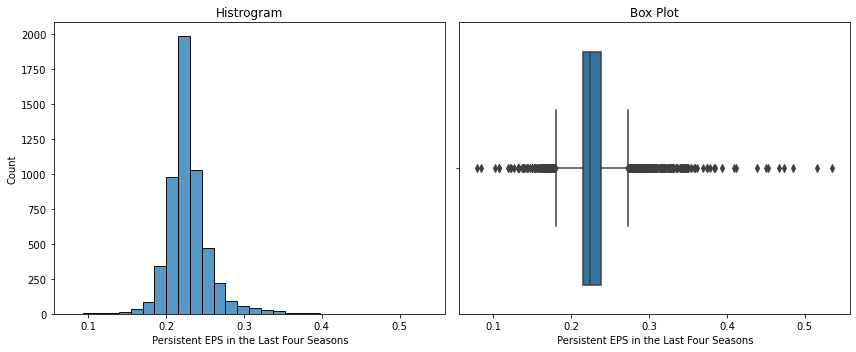

In [8]:
# Sanity Check for the outlier
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: bill_avg Distribution
sns.histplot(df_new, x=' Persistent EPS in the Last Four Seasons' , bins=30, ax=axes[0])
axes[0].set_title('Histrogram')

# Plot 2: Boxplot
sns.boxplot(x=' Persistent EPS in the Last Four Seasons', data=df_new, ax=axes[1])
axes[1].set_title('Box Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

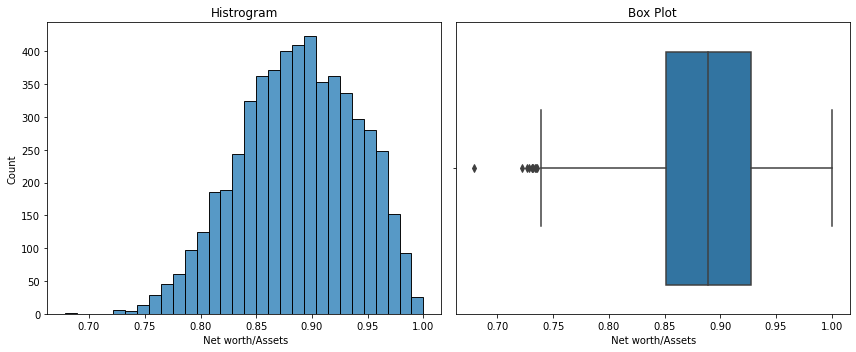

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: bill_avg Distribution
sns.histplot(df_new, x=' Net worth/Assets' , bins=30, ax=axes[0])
axes[0].set_title('Histrogram')

# Plot 2: Boxplot
sns.boxplot(x=' Net worth/Assets', data=df_new, ax=axes[1])
axes[1].set_title('Box Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

**Interpretation**

- After handling some outliers, as we can see there still an outliers in the data.


- But, that is not a problem because the outlier will come as we handling it.


- The important notes that we take is the data get more normal than before

## 5.2 Reset the index and drop unused columns

In [10]:
# Reset The Index
df_new.reset_index(inplace = True)

In [11]:
df_new.drop(['index'],inplace=True,axis=1)

In [12]:
df_new

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Bankrupt?
0,0.493784,0.550153,0.544622,0.200919,0.200919,0.200919,0.221424,0.097956,0.176998,0.054479,0.945521,0.369637,0.097652,0.175145,0.788318,0.048699,0.733835,0.327756,0.932937,0.012305,0.327756,0.025832,0.806631,0.840649,0.276281,0
1,0.534393,0.590765,0.573425,0.195946,0.195946,0.195946,0.249031,0.135412,0.206749,0.160474,0.839526,0.375230,0.135424,0.205822,0.853149,0.132502,0.741153,0.333800,0.942162,0.017890,0.333800,0.025795,0.827723,0.843248,0.282615,0
2,0.526398,0.586895,0.566519,0.187898,0.187898,0.187898,0.230689,0.110903,0.188898,0.064456,0.935544,0.369637,0.110077,0.187218,0.835867,0.051387,0.736437,0.327916,0.941995,0.011238,0.327916,0.016805,0.828627,0.841982,0.276632,0
3,0.469702,0.536851,0.521066,0.183052,0.183052,0.183052,0.216413,0.096979,0.172102,0.170723,0.829277,0.372887,0.096943,0.171141,0.838999,0.178165,0.740521,0.337248,0.935162,0.009103,0.337248,0.030998,0.797846,0.840248,0.283786,0
4,0.391557,0.443197,0.432464,0.162151,0.162151,0.162151,0.202609,0.084684,0.157114,0.014149,0.985851,0.369637,0.084632,0.160312,0.910421,0.018513,0.738884,0.326690,0.917002,0.037158,0.326690,0.004359,0.756573,0.838115,0.275114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,0.550090,0.563890,0.593501,0.237832,0.237832,0.237832,0.239576,0.117499,0.191459,0.150316,0.849684,0.375922,0.117511,0.189759,0.757246,0.080693,0.732480,0.330503,0.942843,0.007798,0.330503,0.044215,0.811639,0.841515,0.281613,0
5432,0.481597,0.528129,0.530007,0.176942,0.176942,0.176942,0.217548,0.099340,0.168261,0.156937,0.843063,0.381245,0.099150,0.167363,0.780239,0.061053,0.734524,0.329607,0.930064,0.016011,0.329607,0.031261,0.791904,0.839643,0.282249,0
5433,0.622288,0.707697,0.689330,0.290885,0.290885,0.290885,0.316347,0.090546,0.254651,0.025456,0.974544,0.369637,0.090543,0.250486,0.807288,0.009658,0.734492,0.326456,0.966794,0.007911,0.326456,0.006380,0.875503,0.844092,0.275407,0
5434,0.586847,0.642172,0.623374,0.188193,0.188193,0.188193,0.248464,0.125316,0.205995,0.074070,0.925930,0.369637,0.125303,0.205037,0.833534,0.068639,0.736502,0.328599,0.952396,0.058585,0.328599,0.020439,0.856548,0.843796,0.277000,0


### Check Misiing value and Duplicated
---

In [13]:
#check null value
df_new.isnull().sum().sort_values(ascending=False)

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 Liability to Equity                                        0
 Net Income to Stockholder's Equity                         0
 Net Income to Total Assets                                 0
 Current Liability to Current Assets                        0
 Current Liability to Equity                                0
 Total expense/Assets                                       0
 Retained Earnings to Total Assets                          0
 Current Liabilities/Equity                                 0
 Working Capital/Equity                                     0
 Current Liability to Assets                                0
 Working Capital to Total Assets                            0
 Net profit before tax/Paid-in capital                      0
 Operating profit/Paid-in capital                           0
 Borrowing dependency                                       0
 Net wor

In [14]:
df_new.duplicated().sum()

0

### Check Imbalance Data
---

<AxesSubplot:>

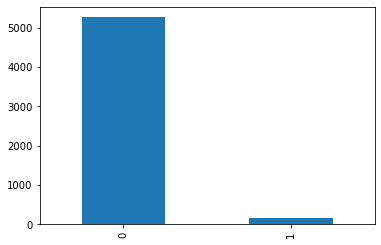

In [15]:
# Target Variables are very imbalance
df_new['Bankrupt?'].value_counts().plot(kind='bar')

In [16]:
# split the trager variable and explainatory variable

x= df_new.drop(['Bankrupt?'],axis=1)
y=df_new['Bankrupt?']

In [17]:
print(f'Besar X: {x.shape}')
print(f'Besar Y: {y.shape}')

Besar X: (5436, 25)
Besar Y: (5436,)


## 5.3 Handling Imbalance
---

use SMOTE method because the data is differ and we need to over sampling it

In [18]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [19]:
x_smote,y_smote=smote.fit_resample(x,y)

In [20]:
print(f'Besar X: {x_smote.shape}')
print(f'Besar Y: {y_smote.shape}')

Besar X: (10534, 25)
Besar Y: (10534,)


In [21]:
y_smote.value_counts()

0    5267
1    5267
Name: Bankrupt?, dtype: int64

<AxesSubplot:>

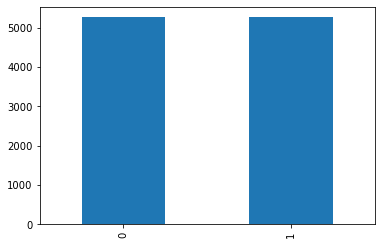

In [22]:
# The data already balance
y_smote.value_counts().plot(kind='bar')

### Filter the columns on data test
---

In [23]:
x_test= joblib.load("data split/x_test.pkl")

In [24]:
column_name =x.columns

In [25]:
x_test[column_name]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total expense/Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
1244,0.503242,0.556149,0.552278,0.174624,0.174624,0.174624,0.221424,0.108867,0.178203,0.157995,0.842005,0.377514,0.108848,0.177226,0.776891,0.102555,0.734249,0.331976,0.934622,0.035324,0.331976,0.037513,0.805667,0.841004,0.282359
6303,0.485984,0.547754,0.530649,0.197463,0.197463,0.197463,0.220384,0.104877,0.177902,0.106721,0.893279,0.374069,0.104898,0.176910,0.746191,0.108178,0.731635,0.330648,0.944185,0.013916,0.330648,0.050631,0.803448,0.840585,0.278525
4712,0.554380,0.618513,0.609562,0.212886,0.212886,0.212886,0.256784,0.105447,0.208933,0.108202,0.891798,0.372164,0.105428,0.205143,0.766523,0.077370,0.732959,0.329401,0.945701,0.015185,0.329401,0.039241,0.839238,0.843206,0.278607
3273,0.663920,0.692324,0.709246,0.212254,0.212254,0.212254,0.279380,0.160003,0.230850,0.062430,0.937570,0.370533,0.159974,0.229560,0.872617,0.047131,0.738328,0.327758,0.962526,0.042321,0.327758,0.012257,0.879037,0.844936,0.276559
6430,0.450641,0.509976,0.495423,0.172138,0.172138,0.172138,0.208188,0.090709,0.167282,0.016507,0.983493,0.369637,0.090845,0.166405,0.832255,0.016797,0.735507,0.326646,0.928248,0.057161,0.326646,0.007415,0.782600,0.839382,0.275173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,0.485010,0.571849,0.533166,0.250516,0.250516,0.250516,0.230406,0.116684,0.202757,0.143000,0.857000,0.369637,0.116257,0.201214,0.784817,0.145060,0.734655,0.333578,0.938377,0.007295,0.333578,0.038199,0.817094,0.841934,0.280973
635,0.482328,0.539304,0.533915,0.167882,0.167882,0.167882,0.215184,0.096491,0.169014,0.171358,0.828642,0.378199,0.096504,0.168313,0.773628,0.106303,0.734176,0.332822,0.931689,0.020585,0.332822,0.038862,0.796868,0.840141,0.283866
6086,0.522352,0.580844,0.563895,0.201888,0.201888,0.201888,0.242318,0.119371,0.200497,0.131481,0.868519,0.370021,0.119335,0.198711,0.859587,0.131014,0.740023,0.332399,0.944596,0.009596,0.332399,0.024921,0.824578,0.842427,0.280082
2308,0.480330,0.547372,0.530917,0.190300,0.190300,0.190300,0.223977,0.104063,0.179031,0.174139,0.825861,0.375146,0.101633,0.175937,0.794093,0.167183,0.736273,0.336856,0.934328,0.005395,0.336856,0.037392,0.804941,0.841049,0.284223


In [26]:
joblib.dump(x_smote,"data split/x_smote.pkl")
joblib.dump(y_smote,"data split/y_smote.pkl")

['data split/y_smote.pkl']